In [5]:
import matplotlib.pyplot as plt  # matplotlib 설치시 혹은 터미널 시작시, 1번과 2번, 3번 명령어 입력으로 폰트깨짐 해결.(Mac 한정.)
from matplotlib import rc        # 1번
rc('font', family='AppleGothic') # 2번
plt.rcParams['axes.unicode_minus'] = False #3번

# Seaborn
- matplotlib을 기반으로 다양한 테마와 그래프를 제공하는 파이썬 시각화 패키지.-
- http://seaborn.pydata.org/
    - 공식 사이트의 [gallary](http://seaborn.pydata.org/examples/index.html)에 제공하는 다양한 그래프와 예제를 확인 할 수 있다.
- 설치: 아나콘다에는 포함되있다.
```
pip install seaborn
conda install seaborn
```
    

In [93]:
# seaborn 설치
!pip install seaborn

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt
tips= sns.load_dataset('tips')
print(type(tips))
tips

<class 'pandas.core.frame.DataFrame'>


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## rugplot, kdeplot, displot
- 1차원 연속형 값들의 분포를 시각화 하는 그래프

### rugplot 
- 각 데이터들의 위치를 보여준다.

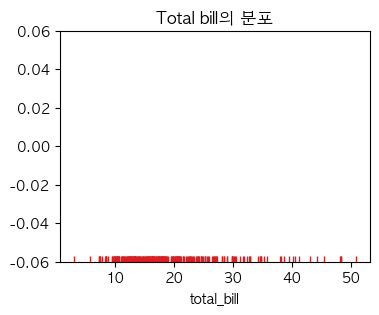

In [97]:
plt.figure(figsize=(4,3))
# sns.rugplot(tips['total_bill'], alpha=0.5)
sns.rugplot(x='total_bill', data=tips)    # data : DateFrame 지정, x="컬럼명"
plt.title('Total bill의 분포')
plt.show()

### kdeplot
- 히스토그램을 부드러운 곡선 형태로 표현한다. 
- KDE(Kernel Density Estimation) : 확률밀도추정

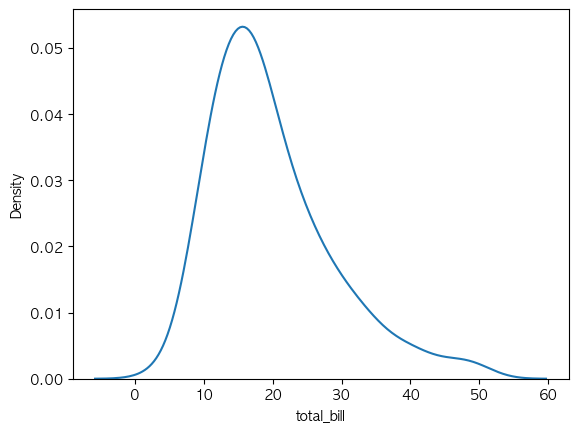

In [11]:
# sns.kdeplot(tips['total_bill'])
sns.kdeplot(x='total_bill', data=tips)
plt.show()

### displot()
- 히스토그램을 기준으로 rugplot, kdeplot을 같이 그릴 수 있다.

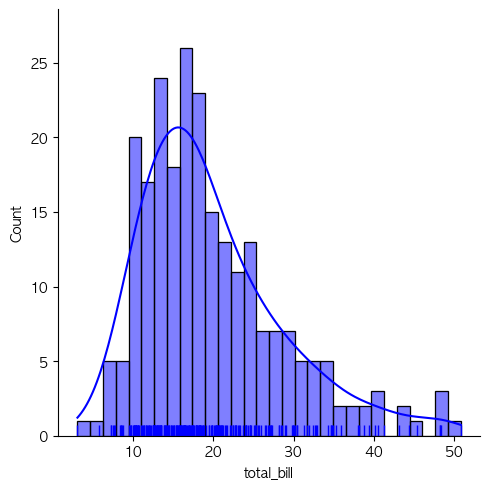

In [18]:
sns.displot(data=tips, x='total_bill', bins=30, ### 세 가지를 묶어서 볼수 있다(rug, kde, displot). ###
           rug=True, 
           kde=True,color='b')
plt.show()

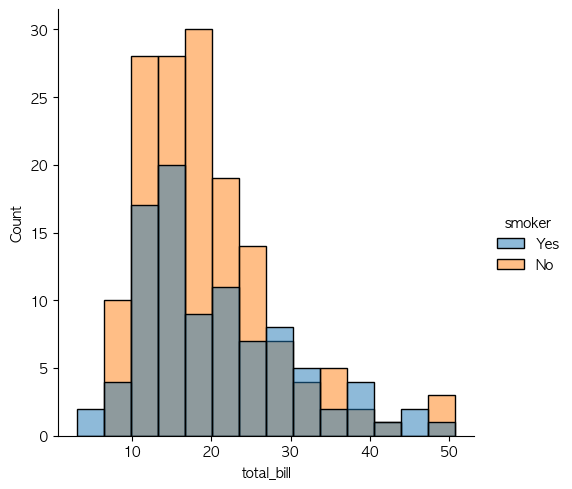

In [26]:
# tips.groupby('smoker')['total_bill' ]

#나눠서 보고 싶다. 

sns.displot(x='total_bill', hue='smoker', data=tips)
plt.show()

## boxplot(), violinplot(), swamplot()
- 연속형 데이터(양적데이터)들의 분포를 확인하는 그래프를 그린다.
- 범주별로 연속형 데이터의 분포를 비교할 수 있다.

### boxplot

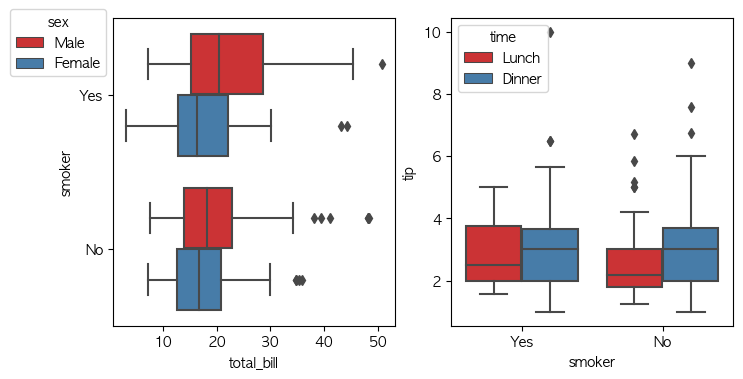

In [99]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

#  x(y)= 연속형, y(x)= 범주형
sns.boxplot(x='total_bill', y='smoker', hue='sex', data=tips,ax=ax1)  # hue = 추가 항목

sns.boxplot(y='tip', x='smoker', hue='time', data=tips, ax=ax2)
ax1.legend(bbox_to_anchor=(0, 1.05), loc='upper right', title='sex')
plt.show()

### violin plot
- boxplot 위에 분포 밀도(kernel density)를 좌우 대칭으로 덮어쓰는 방식으로 데이터의 분포를 표현하므로 boxplot 보다 좀더 정확한 데이터의 분포를 볼 수 있다.
- 매개변수는 boxplot과 동일

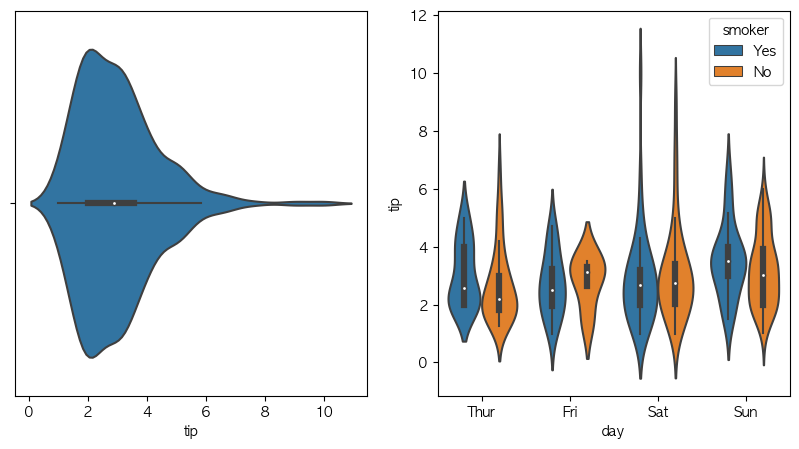

In [51]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.violinplot(data=tips, x='tip')

plt.subplot(1,2,2)
sns.violinplot(data=tips, y='tip', 
               x='day', 
               hue = 'smoker')           # y : 연속형, x : 범주형
plt.show()

<AxesSubplot:xlabel='tip', ylabel='Density'>

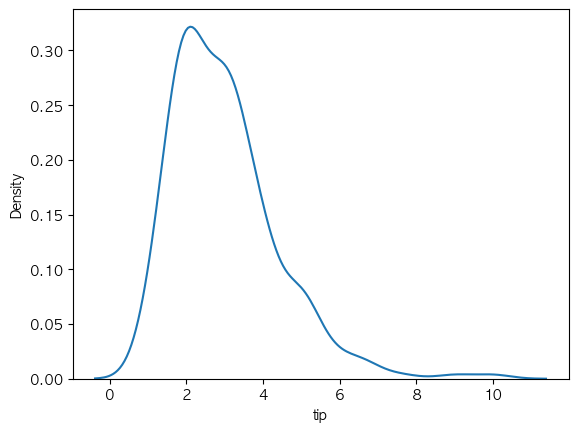

In [49]:
sns.kdeplot(data=tips, x='tip')

### swarmplot
- 실제 값들을 점으로 찍어 준다. 
- boxplot이나 violin plot의 보안해주는 역할로 쓰인다.
- swarmplot은 가운데 분류를 기준으로 분포시키는데 실제 값이 있는 위치에 점을 찍으므로 좀더 정확하게 값이 어디에 있는지 알 수 있다.

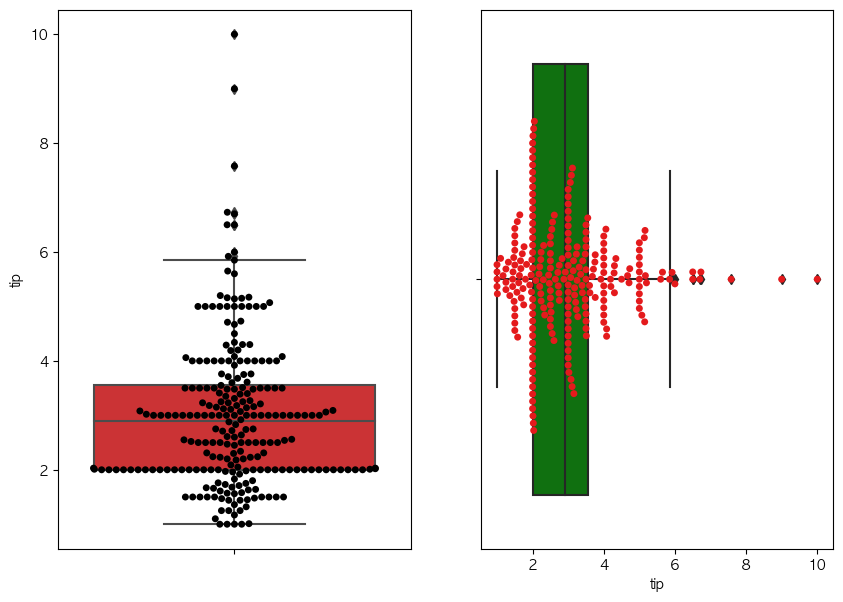

In [100]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
sns.boxplot(y='tip', data=tips)
sns.swarmplot(y='tip', data=tips, color='black')

plt.subplot(1,2,2)
sns.boxplot(x='tip', data=tips, color='green')
sns.swarmplot(x='tip', data=tips)

plt.show()

### countplot() 
- 막대그래프(bar plot)을 그리는 함수
- 범주형 변수의 고유값의 개수를 표시
- matplotlib의 bar()

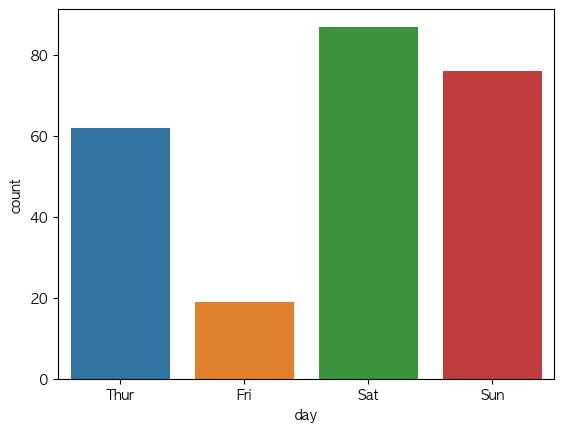

In [56]:
sns.countplot(data=tips, x='day')  #수직 막대
plt.show()

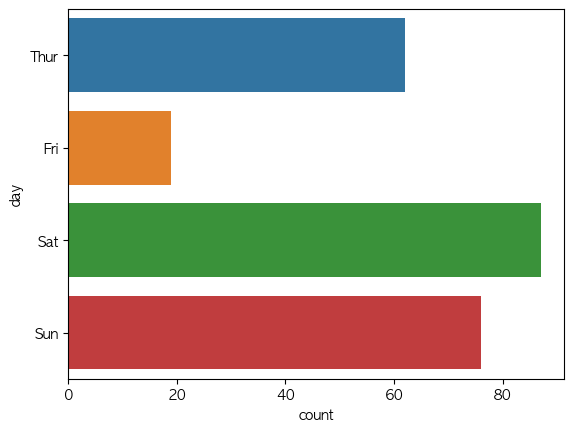

In [57]:
sns.countplot(data=tips, y='day')  #수평 막대
plt.show()

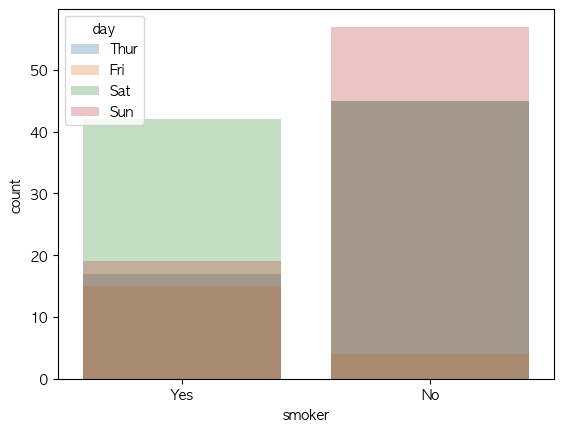

In [67]:
# 흡연 / 비흡연자 개수 요일별로 나눠서 시각화
sns.countplot(x='smoker', hue='day', data=tips,
             dodge=False,  # 수평 누적막대 여부 ㅣ: 기본 - True
             alpha=0.3)  
plt.show()

## scatterplot, lmplot, jointplot, pairplot
- 산점도를 그린다.

### scatterplot

팔레트 - https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial

칼라맵 - https://hleecaster.com/python-seaborn-color/

In [103]:
sns.set_palette('Set1')   # 팔레트 색상 버전을 set1로 한다 라고 지정.

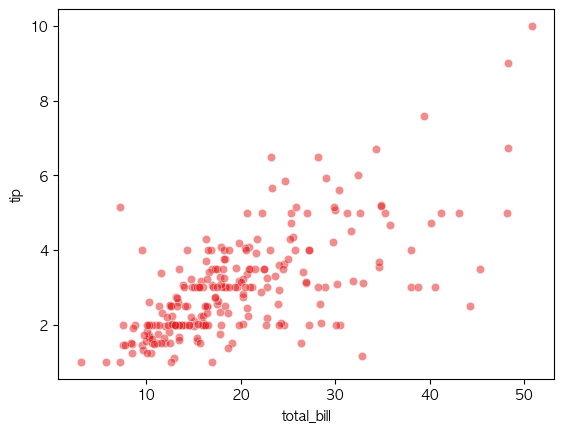

In [104]:
sns.scatterplot(data=tips, x='total_bill', y='tip', alpha=0.5)
plt.show()

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

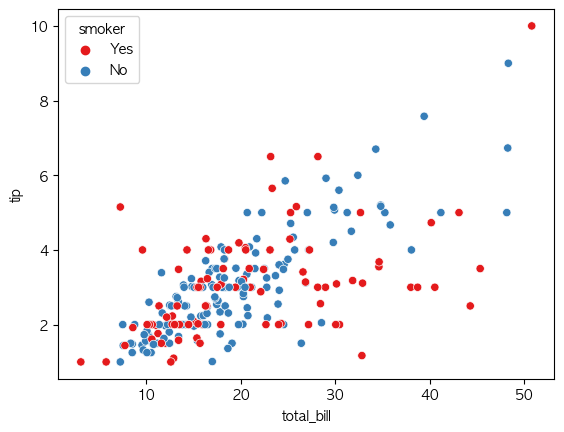

In [106]:
sns.scatterplot(data=tips, x='total_bill', y='tip', 
               hue='smoker',      # hue - smoker 별로 보여 달라.
               palette='Set1')    # 팔레트: 색상.

### Lmplot()
- 선형회귀 적합선을 포함한 산점도를 그린다.

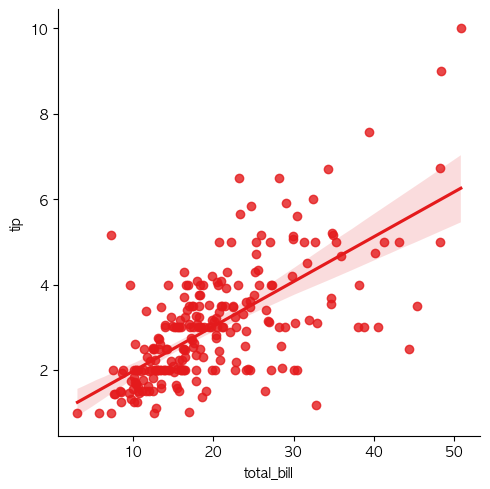

In [74]:
sns.lmplot(data=tips, x='total_bill', y='tip')
plt.show()

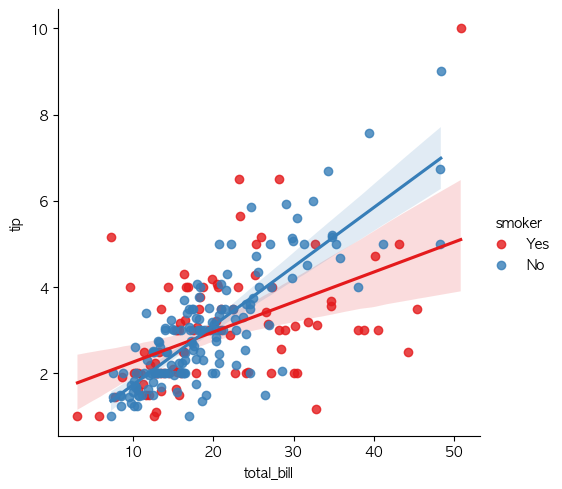

In [75]:
sns.lmplot(data=tips, x='total_bill', y='tip', hue='smoker')
plt.show()

### jointplot()
- scatter plot 과 각 변수의 히스토그램을 같이 그린다.
- pandas **DataFrame**만 사용할 수 있다.
- DataFrame

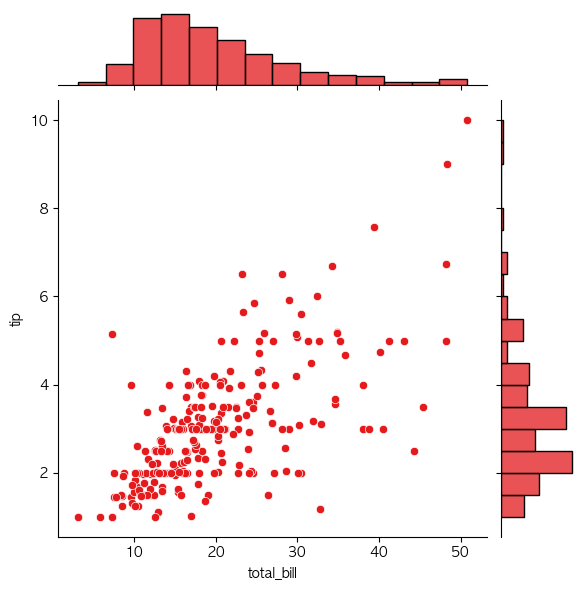

In [76]:
sns.jointplot(x='total_bill', y='tip', data=tips)
plt.show()

### pairplot
- 다변수(다차원) 데이터들 간의 산점도를 보여준다. 
- 데이터프레임을 인수로 받아 그리드(grid) 형태로 각 변수간의 산점도를 그린다. 같은 변수가 만나는 대각선 영역에는 해당 데이터의 히스토그램을 그린다.

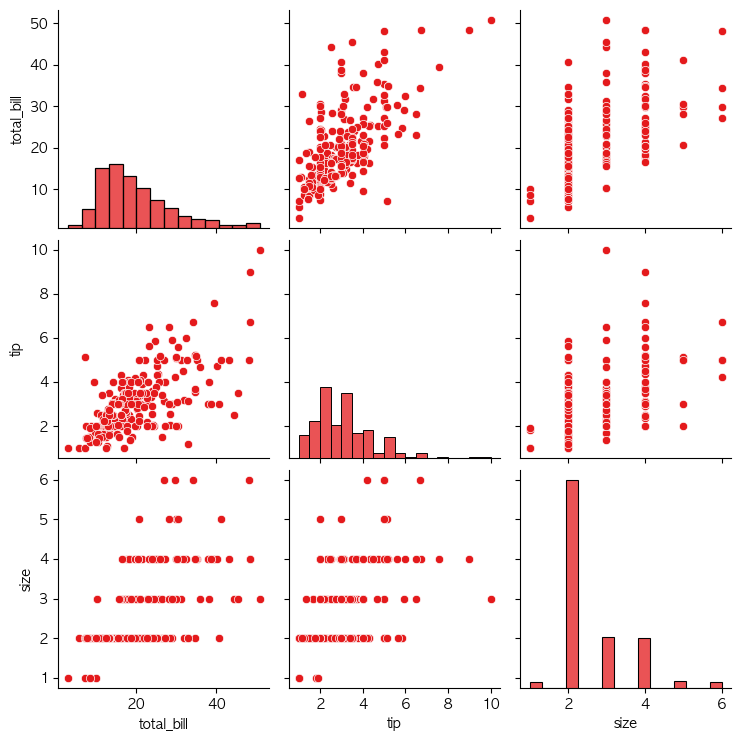

In [77]:
sns.pairplot(tips)  # 문자열은 그리지 못함 / 수치형 데이터만 표로 그릴 수 있다. 
plt.show()


### heatmap()
- 값들에 비례해서 색깔을 다르게 해 2차원 자료로 시각화

In [78]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


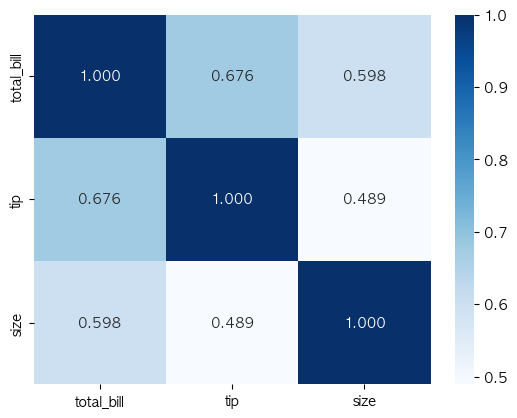

In [81]:
sns.heatmap(tips[["total_bill", "tip", "size"]].corr(), 
            annot=True, 
            fmt ='.3f', 
            cmap='Blues')

plt.show()

### lineplot
- 선그래프
- 시간의 흐름에 따른 값의 변화를 보여주는데 유용하다. (시계열 데이터)

In [83]:
import pandas as pd
import numpy as np

index=pd.date_range('2023/01/01', freq="MS", periods=10) 
                                  #freq=MS -> 기준점을 중심으로 매월 첫째날을 10개월 주기로
values = np.random.randint(1,100,size=(10,3))
df = pd.DataFrame(values, index=index, columns=['no1', 'no2', 'no3'])
df

,no1,no2,no3
2023-01-01,6,38,3
2023-02-01,20,58,11
2023-03-01,13,91,49
2023-04-01,13,30,90
2023-05-01,36,92,19
2023-06-01,3,7,85
2023-07-01,77,51,84
2023-08-01,5,58,39
2023-09-01,1,46,78
2023-10-01,54,25,6


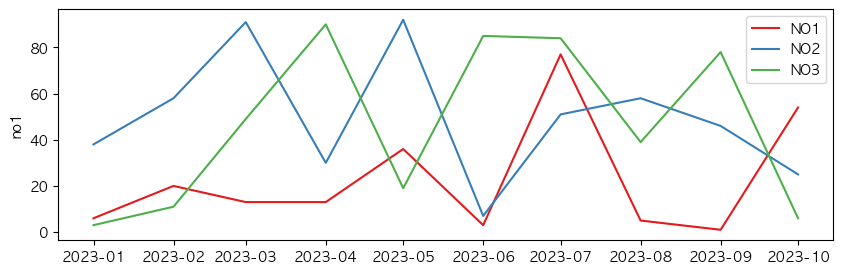

In [87]:
plt.figure(figsize=(10,3))
sns.lineplot(data=df, y='no1', x=df.index)
sns.lineplot(data=df, y='no2', x=df.index)
sns.lineplot(data=df, y='no3', x=df.index)
plt.legend(['NO1', 'NO2', 'NO3'])
plt.show()

In [88]:
df['cate'] = ['A', 'B', 'C','A', 'B', 'C','A', 'B', 'C','C']
df

,no1,no2,no3,cate
2023-01-01,6,38,3,A
2023-02-01,20,58,11,B
2023-03-01,13,91,49,C
2023-04-01,13,30,90,A
2023-05-01,36,92,19,B
2023-06-01,3,7,85,C
2023-07-01,77,51,84,A
2023-08-01,5,58,39,B
2023-09-01,1,46,78,C
2023-10-01,54,25,6,C


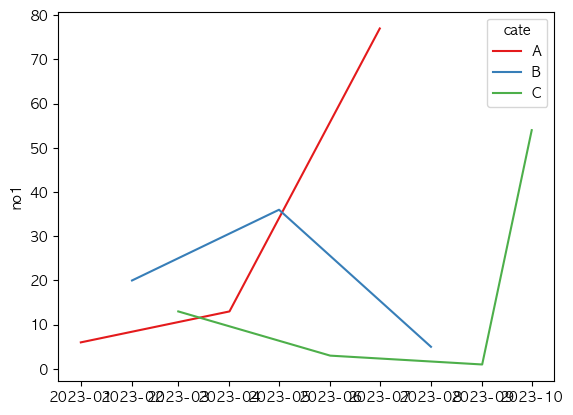

In [90]:
sns.lineplot(data=df, x=df.index, y='no1', hue='cate')
plt.show()